In [1]:
import numpy as np
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.mlab as mlab
from matplotlib.patches import Ellipse


%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

clusterNumber = 3

In [2]:
A = np.loadtxt('trainingdata.train')
Asize = A.shape # via property of element

In [3]:
#fig0 = plt.figure()
#ax0 = fig0.add_subplot( 111 )
#ax0.scatter( A[:,3], A[:,4] )
#plt.show()
#significant columns found, 3x4

In [4]:
def getcolour(x):
    if(x==0):
        return 'r';
    elif(x==1):
        return 'g';
    elif(x==2):
        return 'b'
    elif(x==3):
        return 'brown'
    elif(x==4):
        return 'yellow'
    elif(x==5):
        return 'pink'
    elif(x==6):
        return'cyan'
    elif(x==7):
        return'cyan'
    elif(x==8):
        return'cyan'
    elif(x==9):
        return'cyan'
    elif(x==10):
        return'cyan'
    elif(x==11):
        return'cyan'

In [5]:
B = np.matrix([A[:,1], A[:,4]]).T
Bsize = B.shape # via property of element
print ("B size: ", Bsize)
#print(B)

B size:  (150, 2)


In [6]:
kmeans = KMeans(n_clusters=clusterNumber, random_state=0).fit(B)
    #max_iter=1, precompute_distances=False, n_init =1

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
inertia = kmeans.inertia_


In [7]:
colourlist = []

for x in range(0,int(B.size/2)):
        colourlist.append(getcolour(labels[x]))


/home/harrygoode22/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


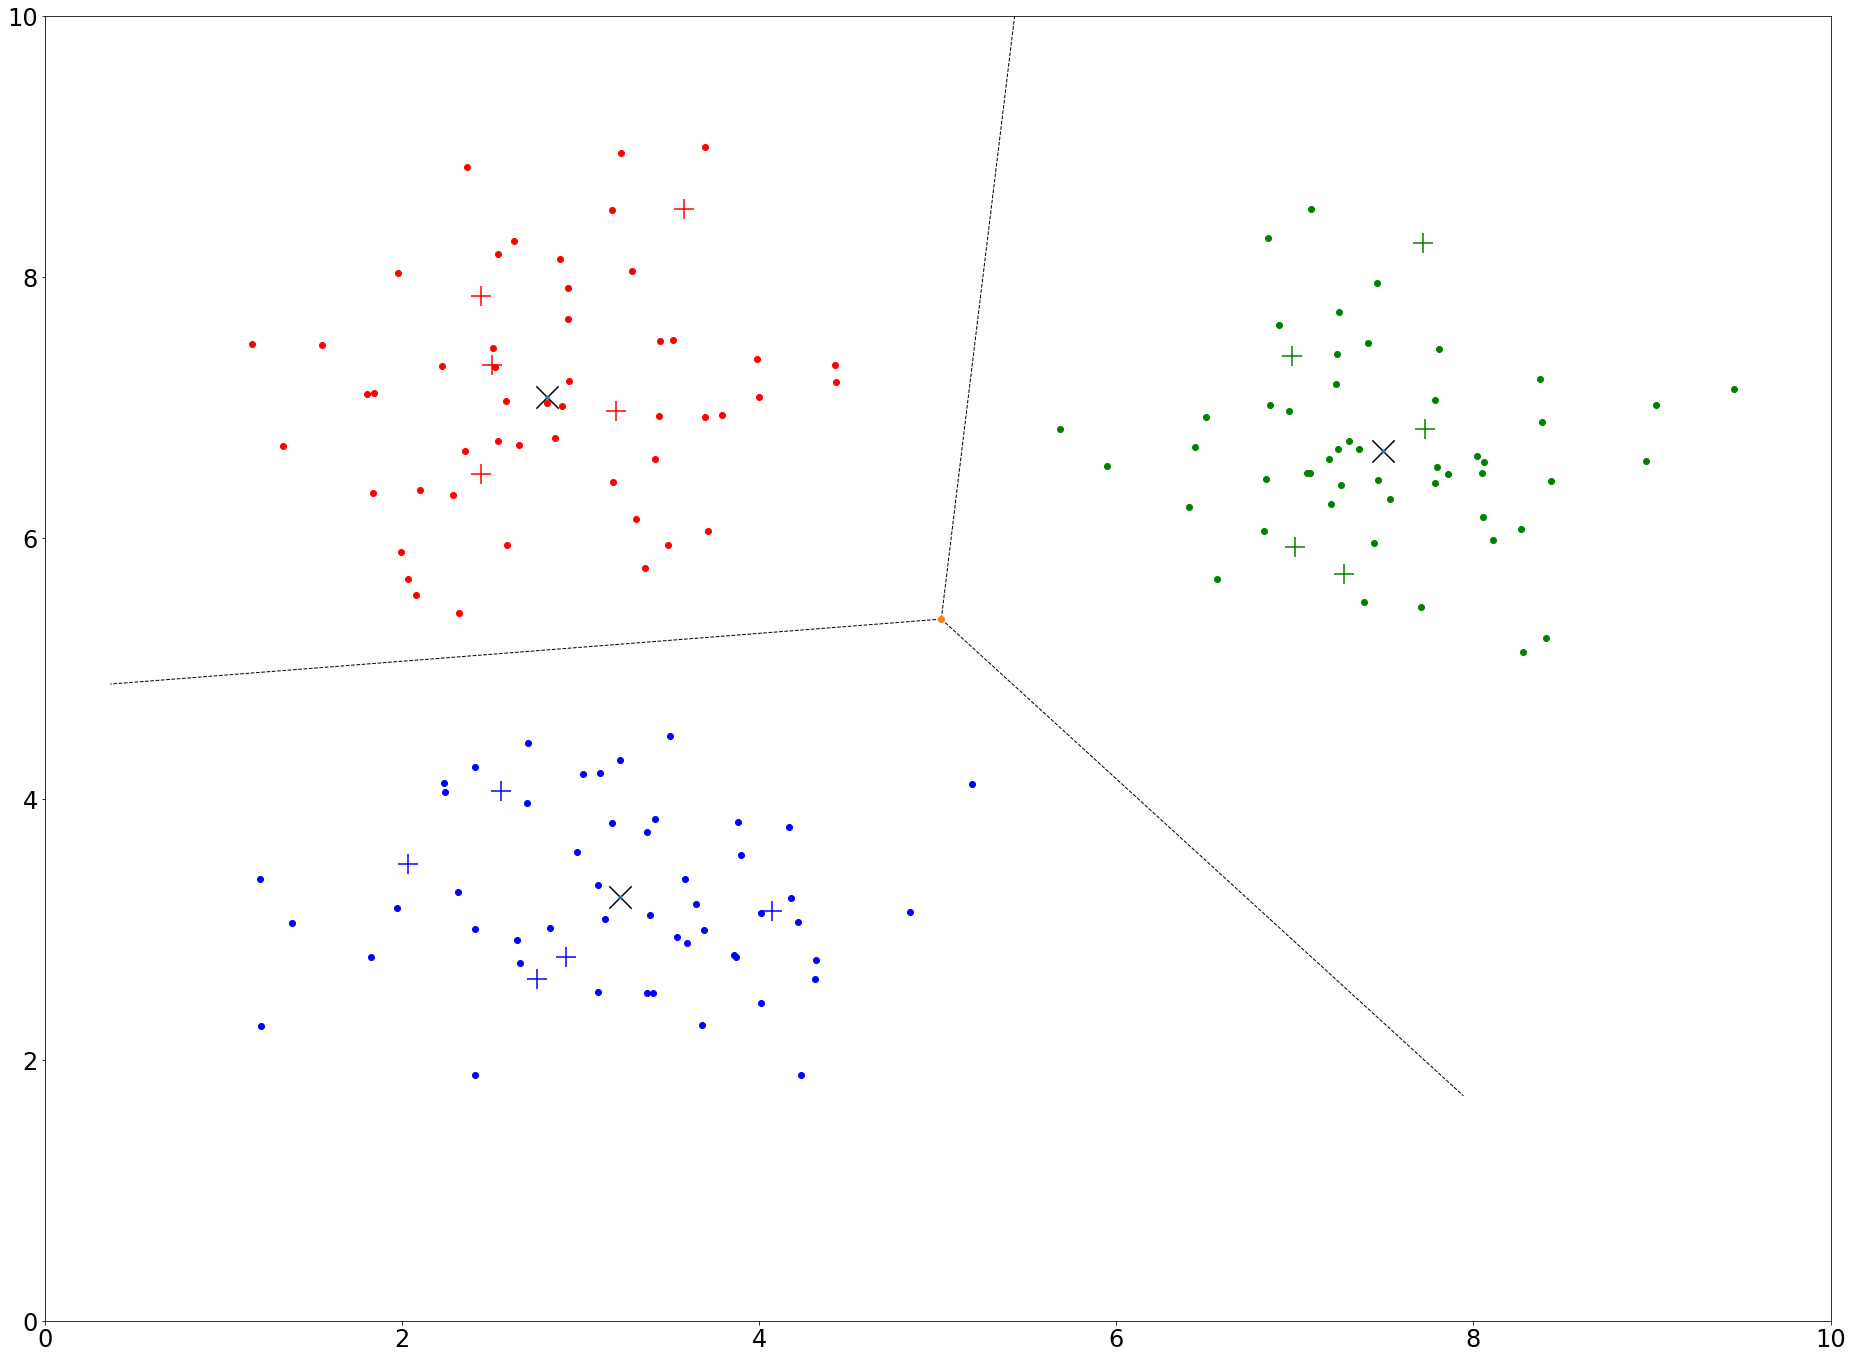

In [8]:

voronoi = True
showTest = True
showTraining = True


centroidx = np.squeeze(np.asarray(centroids[:,0]))
centroidy = np.squeeze(np.asarray(centroids[:,1]))

if(voronoi):
    vor = Voronoi(centroids)
    fig = voronoi_plot_2d(vor)
else: fig = plt.figure()

axis = fig.add_subplot( 111 )
axis.set_xlim([0,10])
axis.set_ylim([0,10])

for x in range(0,int(B.size/2)):
     axis.scatter( B[x,0], B[x,1], c=colourlist[x])
    
axis.scatter( centroidx, centroidy, c='black', marker = 'x', s=500 )

testfile = np.loadtxt('testdata.test')
testdata = np.squeeze(np.asarray([testfile[:,1],testfile[:,4]])).T

cdistance = cdist(testdata,centroids)
colourlistTest = []

if(showTraining): #assign colour of test data to closest centroid
    for x in range(0,int(testdata.size/2)):
        centroid = np.argmin(cdistance[x,:])
        colourlistTest.append(getcolour(centroid))

if(showTest): #show the text points

    testx = np.squeeze(np.asarray(testdata[:,0]))
    testy = np.squeeze(np.asarray(testdata[:,1]))

    for x in range(0,testx.size):
        axis.scatter( testx[x], testy[x], c=colourlistTest[x], s=400, marker='+')


plt.show()



In [9]:
sumC =[0]*len(centroids)

for x in range(0,int(B.size/2)):
    sumC[labels[x]]+=cdist(B[x], [centroids[labels[x]]])**2

printDistance = False
if(printDistance):
    for x in range(0,len(centroids)):
        print("Custer distance from centroid ",x+1," is ",float(sumC[x]))


In [10]:
#MLE#################################################################################################################

#SPLIT CLASSES UP
classes = [np.matrix([0,0])]*len(centroids)

#putting into classes based on label
for x in range(0,int(B.size/2)):
    classes[labels[x]]=np.concatenate((classes[labels[x]],B[x,:]))
    
#delete empty at start of each class        
for x in range(0,len(centroids)):   
    classes[x] = np.delete(classes[x], (0), axis=0)
      

In [11]:
means = [[0,0]]*len(classes)

for x in range(0,len(classes)): #loop through each class
    for y in range(0, len(classes[x])): #loop through every point in each class
        means[x] = [(means[x][0]+classes[x][y,0]),(means[x][1]+classes[x][y,1])]    
    means[x][0] = means[x][0]/(len(classes[x])) #divide to find mean
    means[x][1] = means[x][1]/(len(classes[x]))

print(means)

[[2.8125408620000014, 7.0807135280000004], [7.4926520939999977, 6.664972884], [3.2226860779999997, 3.2478201219999998]]


In [12]:
#get covariances 
covariances = [[0]]*len(classes)
#print(covariances)
for x in range(0,len(classes)):
    covariances[x] = np.cov(classes[x].T)

print(covariances[0])

[[ 0.59043198  0.09279924]
 [ 0.09279924  0.76919954]]


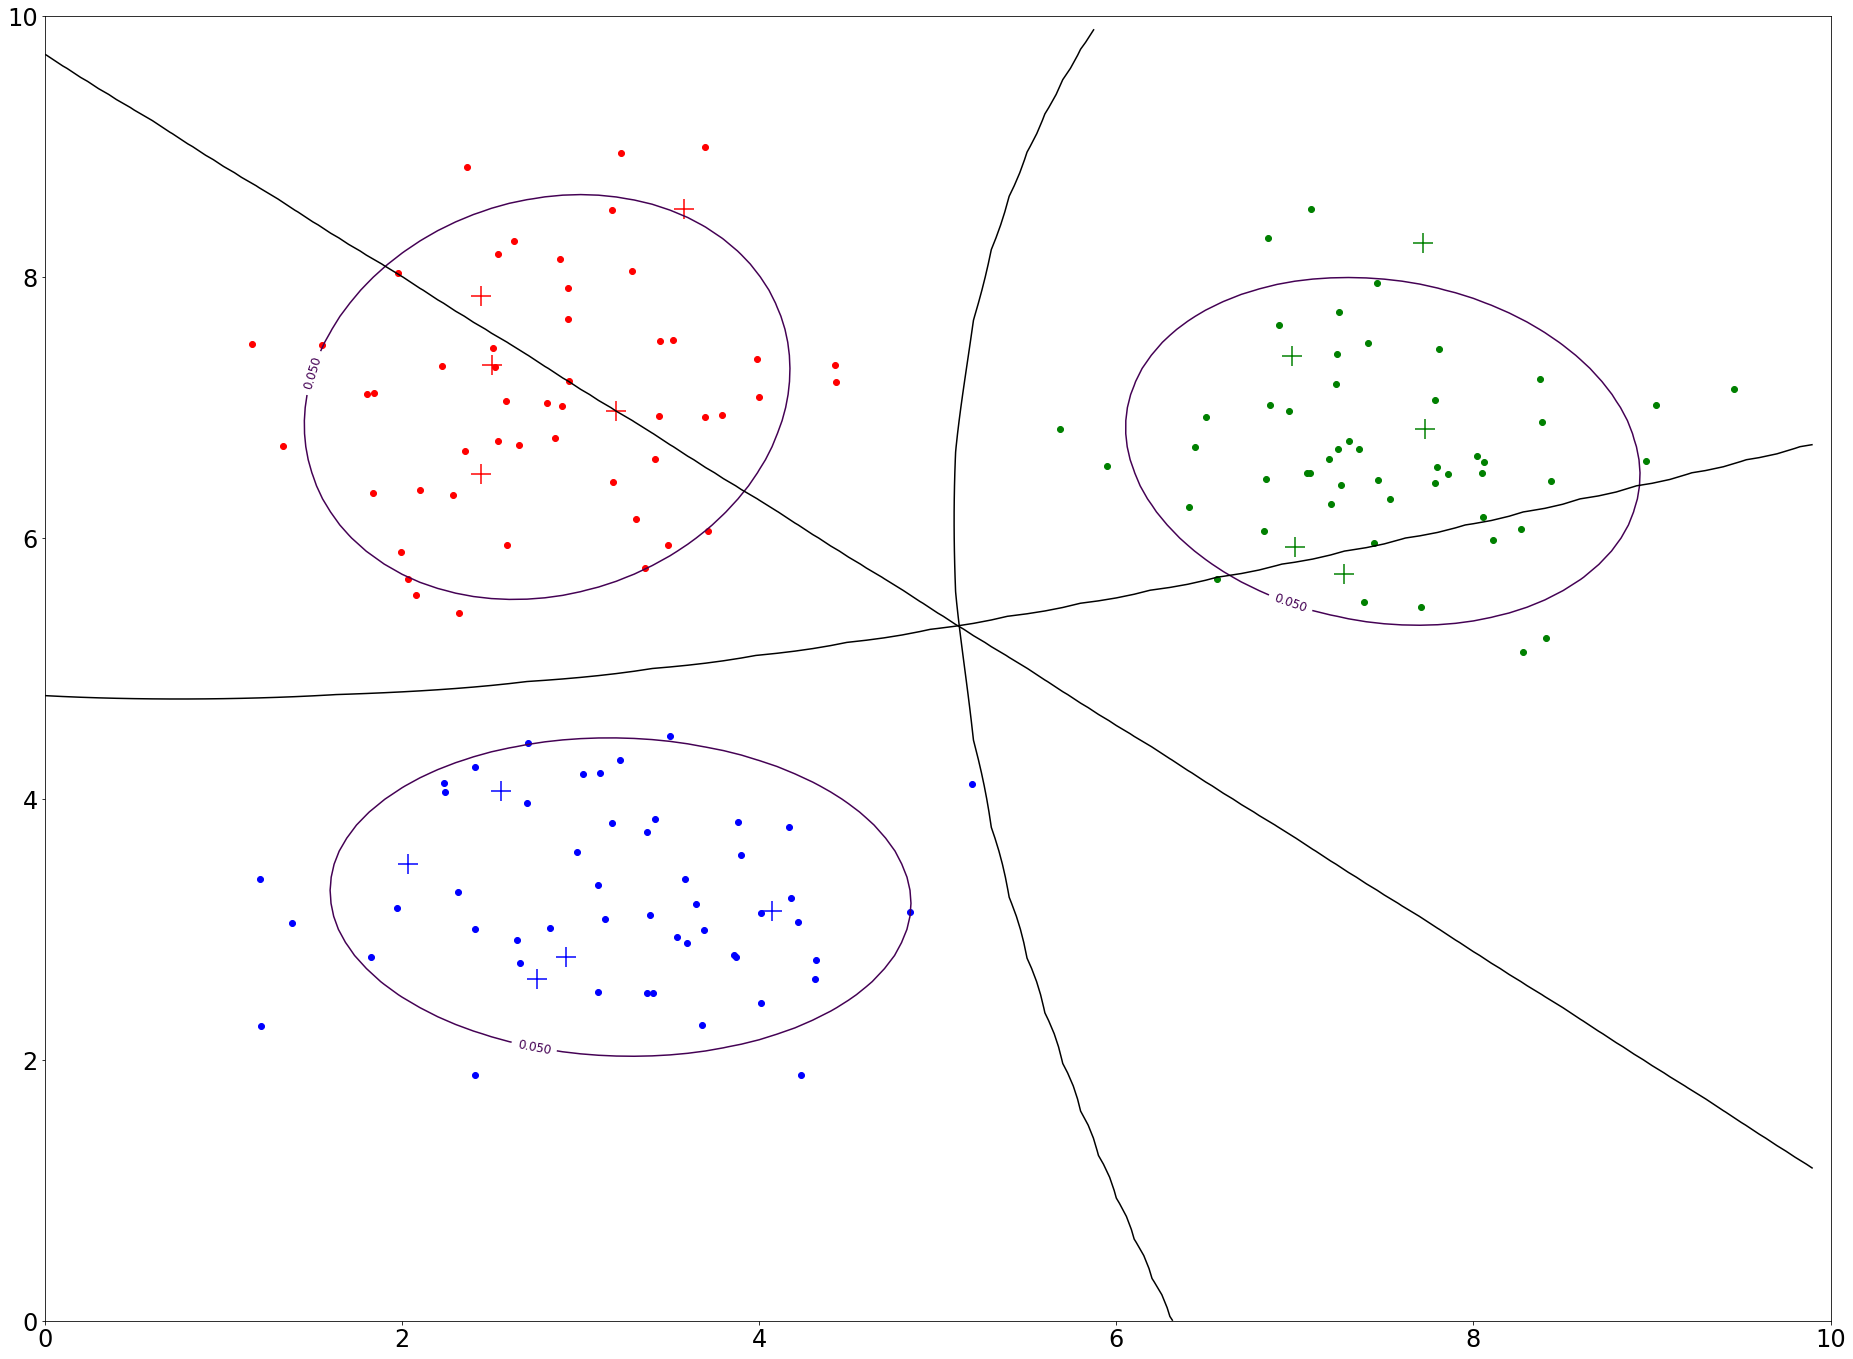

In [13]:
def getprob(x, y, mu, sigma):
    vec = np.matrix([x, y])
    mua = np.matrix(mu)
    E = 2.0 * np.pi * np.sqrt(np.linalg.det(sigma))
    P = (1/E) * np.exp(-1 * ((vec-mua) * np.linalg.inv(sigma) * (vec.T-mua.T)/2.0 ))#
    return float(P) 

def getsigmaP(sigma):
    return  (1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma)))) * np.exp(-1/2.0)



#CHANGE FOR VIEW
twoD = True
if(twoD):
    
    fig = plt.figure()
    axis = fig.add_subplot( 111 )
    axis.set_xlim([0,10])
    axis.set_ylim([0,10])
    
    for i in range(0,len(classes)):
        x, y = np.mgrid[0:10:.1, 0:10:.1]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x 
        pos[:, :, 1] = y
        rv = multivariate_normal(means[i], covariances[i])
        CS = plt.contour(x, y, rv.pdf(pos),[0.05])
        plt.clabel(CS, fontsize=12, inline=1)
        
        for u in range(0,len(classes[i])):
                plt.scatter(classes[i][u,0],classes[i][u,1], c=getcolour(i))
    
    x = np.arange(0, 10, 0.1)
    y = np.arange(0, 10, 0.1)
        
    classP = [[0]]*len(classes)

    for i in range (0, len(classes)):
            classP[i] = np.zeros((len(y), len(x)))
        
    for i in range(len(x)):
            for j in range(len(y)):
                for k in range(0,len(classes)):
                    classP[k][j,i] = getprob(x[i], y[j], means[k],covariances[k]) #np.matrix( [[1,0],[0,1]])
                    
    sumCount = 0.5*len(classes)*(len(classes)-1)
    LR = [[]]*int(sumCount)   
    counter = 0
    for i in range(0, len(classes)):
        for j in range(i+1, len(classes)):
            LR[counter] = np.divide(classP[i],classP[j])
            counter+=1
        
    for i in range(0, len(LR)):
        plt.contour(x, y, LR[i], [1], colors='black')
    
    testx = np.squeeze(np.asarray(testdata[:,0]))
    testy = np.squeeze(np.asarray(testdata[:,1]))
    
    colourlistTest = []

    for x in range(0,int(testdata.size/2)):
        ml1 = getprob(testx[x], testy[x], means[0],covariances[0])
        ml2 = getprob(testx[x], testy[x], means[1],covariances[1])
        ml3 = getprob(testx[x], testy[x], means[2],covariances[2])
        if(ml1>ml2 and ml1>ml3):
            colourlistTest.append(getcolour(0))
        elif(ml2>ml1 and ml2>ml3):
            colourlistTest.append(getcolour(1))
        if(ml3>ml1 and ml3>ml2):
            colourlistTest.append(getcolour(2))
    
    
    for x in range(0,testx.size):
        plt.scatter( testx[x], testy[x], c=colourlistTest[x], s=400, marker='+')         
        
                
else:
    x = np.arange(0, 10, 0.1)
    y = np.arange(0, 10, 0.1)
        
    for i in range (0, len(classes)):
            classP[i] = np.zeros((len(y), len(x)))

    for i in range(len(x)):
            for j in range(len(y)):
                for k in range(0,len(classes)):
                    classP[k][j,i] = getprob(x[i], y[j], means[k], covariances[k])
                    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    Pbs = 0
    for i in range(0, len(classes)):
        Pbs = np.maximum(Pbs, classP[i])
        
    vmin=np.nanmin(Pbs)
    vmax=np.nanmax(Pbs)

    xl, yl= np.meshgrid(x, y)
    ax.plot_surface(xl, yl, Pbs,\
      vmin=vmin, vmax=vmax,\
      rstride=1, cstride=1, cmap=plt.cm.jet, alpha=0.3, linewidth=0, antialiased=False)

    for i in range(0,len(classes)):
        ax.contour(xl, yl, classP[i], getsigmaP(covariances[i]), colors='blue', linewidths=5, levels = [0.05])
    
    sumCount = 0.5*len(classes)*(len(classes)-1)
    LR = [[]]*int(sumCount)   
    counter = 0
    for i in range(0, len(classes)):
        for j in range(i+1, len(classes)):
            LR[counter] = np.divide(classP[i],classP[j])
            counter+=1
    
    for i in range(0, len(LR)):
        ax.contour(xl, yl, LR[i], [1], offset=0, colors='g', linewidths=5)

    ax.set_zlim(0, 1.5*vmax)
    #ax.view_init(elev=90, azim=-90)

# plt.show()

